In [78]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();

  Activating environment at `c:\Users\william\Desktop\robot-dynamics-playground\demos\Project.toml`


Precompiling project...


  ✓ Qt6Base_jll


  ✓ GR_jll


  ✓ GR


  ✓ Plots


  4 dependencies successfully precompiled in 75 seconds (171 already precompiled)
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [10]:
using LinearAlgebra
using Plots
using StaticArrays

In [84]:
include(joinpath(@__DIR__,"..","RobotDynamics","RobotDynamics.jl"));
include(joinpath(@__DIR__,"..","OptimalControl","OptimalControl.jl"));

In [80]:
model = CartPole(input=:force);

In [85]:
x₀     = @SVector[0,0,0,0.]
x_goal = @SVector[0,π,0,0.]

Δt = 1/20
N = 101
u_guess = [@SVector[0.0] for k = 1:N-1]

Qₖ = I(4)
Rₖ = 0.1
Qₙ = 100 * I(4)

state_trans_func = (xₖ,uₖ) -> dynamics_rk4(model, xₖ, uₖ, Δt)
stage_cost = (k,xₖ,uₖ) -> 0.5 * (xₖ-x_goal)' * Qₖ * (xₖ-x_goal) + 0.5 * uₖ' * Rₖ * uₖ
terminal_cost = xₙ -> 0.5 * (xₙ-x_goal)' * Qₙ * (xₙ-x_goal)

sol = OptimalControl.DDP(state_trans_func, stage_cost, terminal_cost, x₀, u_guess);

┌ Info: DDP completed because max_iters was reached
└ @ Main.OptimalControl c:\Users\william\Desktop\robot-dynamics-playground\OptimalControl\DDP.jl:124


In [86]:
vis = mc.Visualizer();

┌ Info: Listening on: 127.0.0.1:8712, thread id: 1
└ @ HTTP.Servers C:\Users\william\.julia\packages\HTTP\bDoga\src\Servers.jl:367
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8712
└ @ MeshCat C:\Users\william\.julia\packages\MeshCat\I6NTX\src\visualizer.jl:63


In [87]:
set_mesh!(vis, model)
animate!(vis, model, sol.x, Δt)

display(mc.render(vis))

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("cart_pendulum" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("rail" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x72, 0x61, 0x69, 0x6c], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "cart" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x63, 0x61, 0x72, 0x74], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x63, 0x61, 0x72, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "pendulum" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("pole" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x70, 0x6f, 0x6c, 0x65], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x70, 0x6f, 0x6c, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "hinge" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x68, 0x69, 0x6e, 0x67, 0x65], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x68, 0x69, 0x6e, 0x67, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "mass" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x6d, 0x61, 0x73, 0x73], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x75, 0x6c, 0x75, 0x6d, 0x2f, 0x6d, 0x61, 0x73, 0x73], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))), "Axes" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x41, 0x78, 0x65, 0x73]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), Set{HTTP.WebSockets.WebSocket}(), ip"127.0.0.1", 8712))

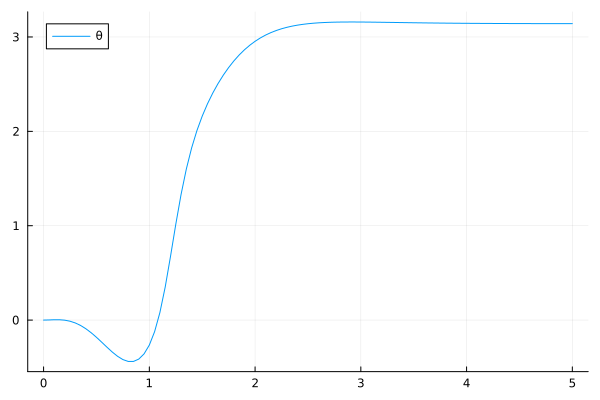

In [88]:
data = reshape(reinterpret(Float64, sol.x), 4,:)'
plot((0:N-1)*Δt, data[:,2], label=raw"\theta")